## Step

- 1: Exploratory Data Analysis (EDA)
- :Conveting object into numerical values LabelEncoder
- 2: Data Preprocessing
- 3: Data Visualization
- 4: SVM Implementation
- 5: Visualization of SVM Results
- 6: Parameter Tuning and Optimization
- 7: Comparison and Analysis

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [3]:
md = pd.read_csv('mushroom.csv')
md

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


## Exploratory Data Analysis (EDA)

In [4]:
md.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
md.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
md.shape

(2000, 26)

In [7]:
md.dtypes

,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


In [8]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

# Conveting object into numerical values LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
for columns in md.columns:
    md[columns] = label_encoder.fit_transform(md[columns])

In [12]:
md.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


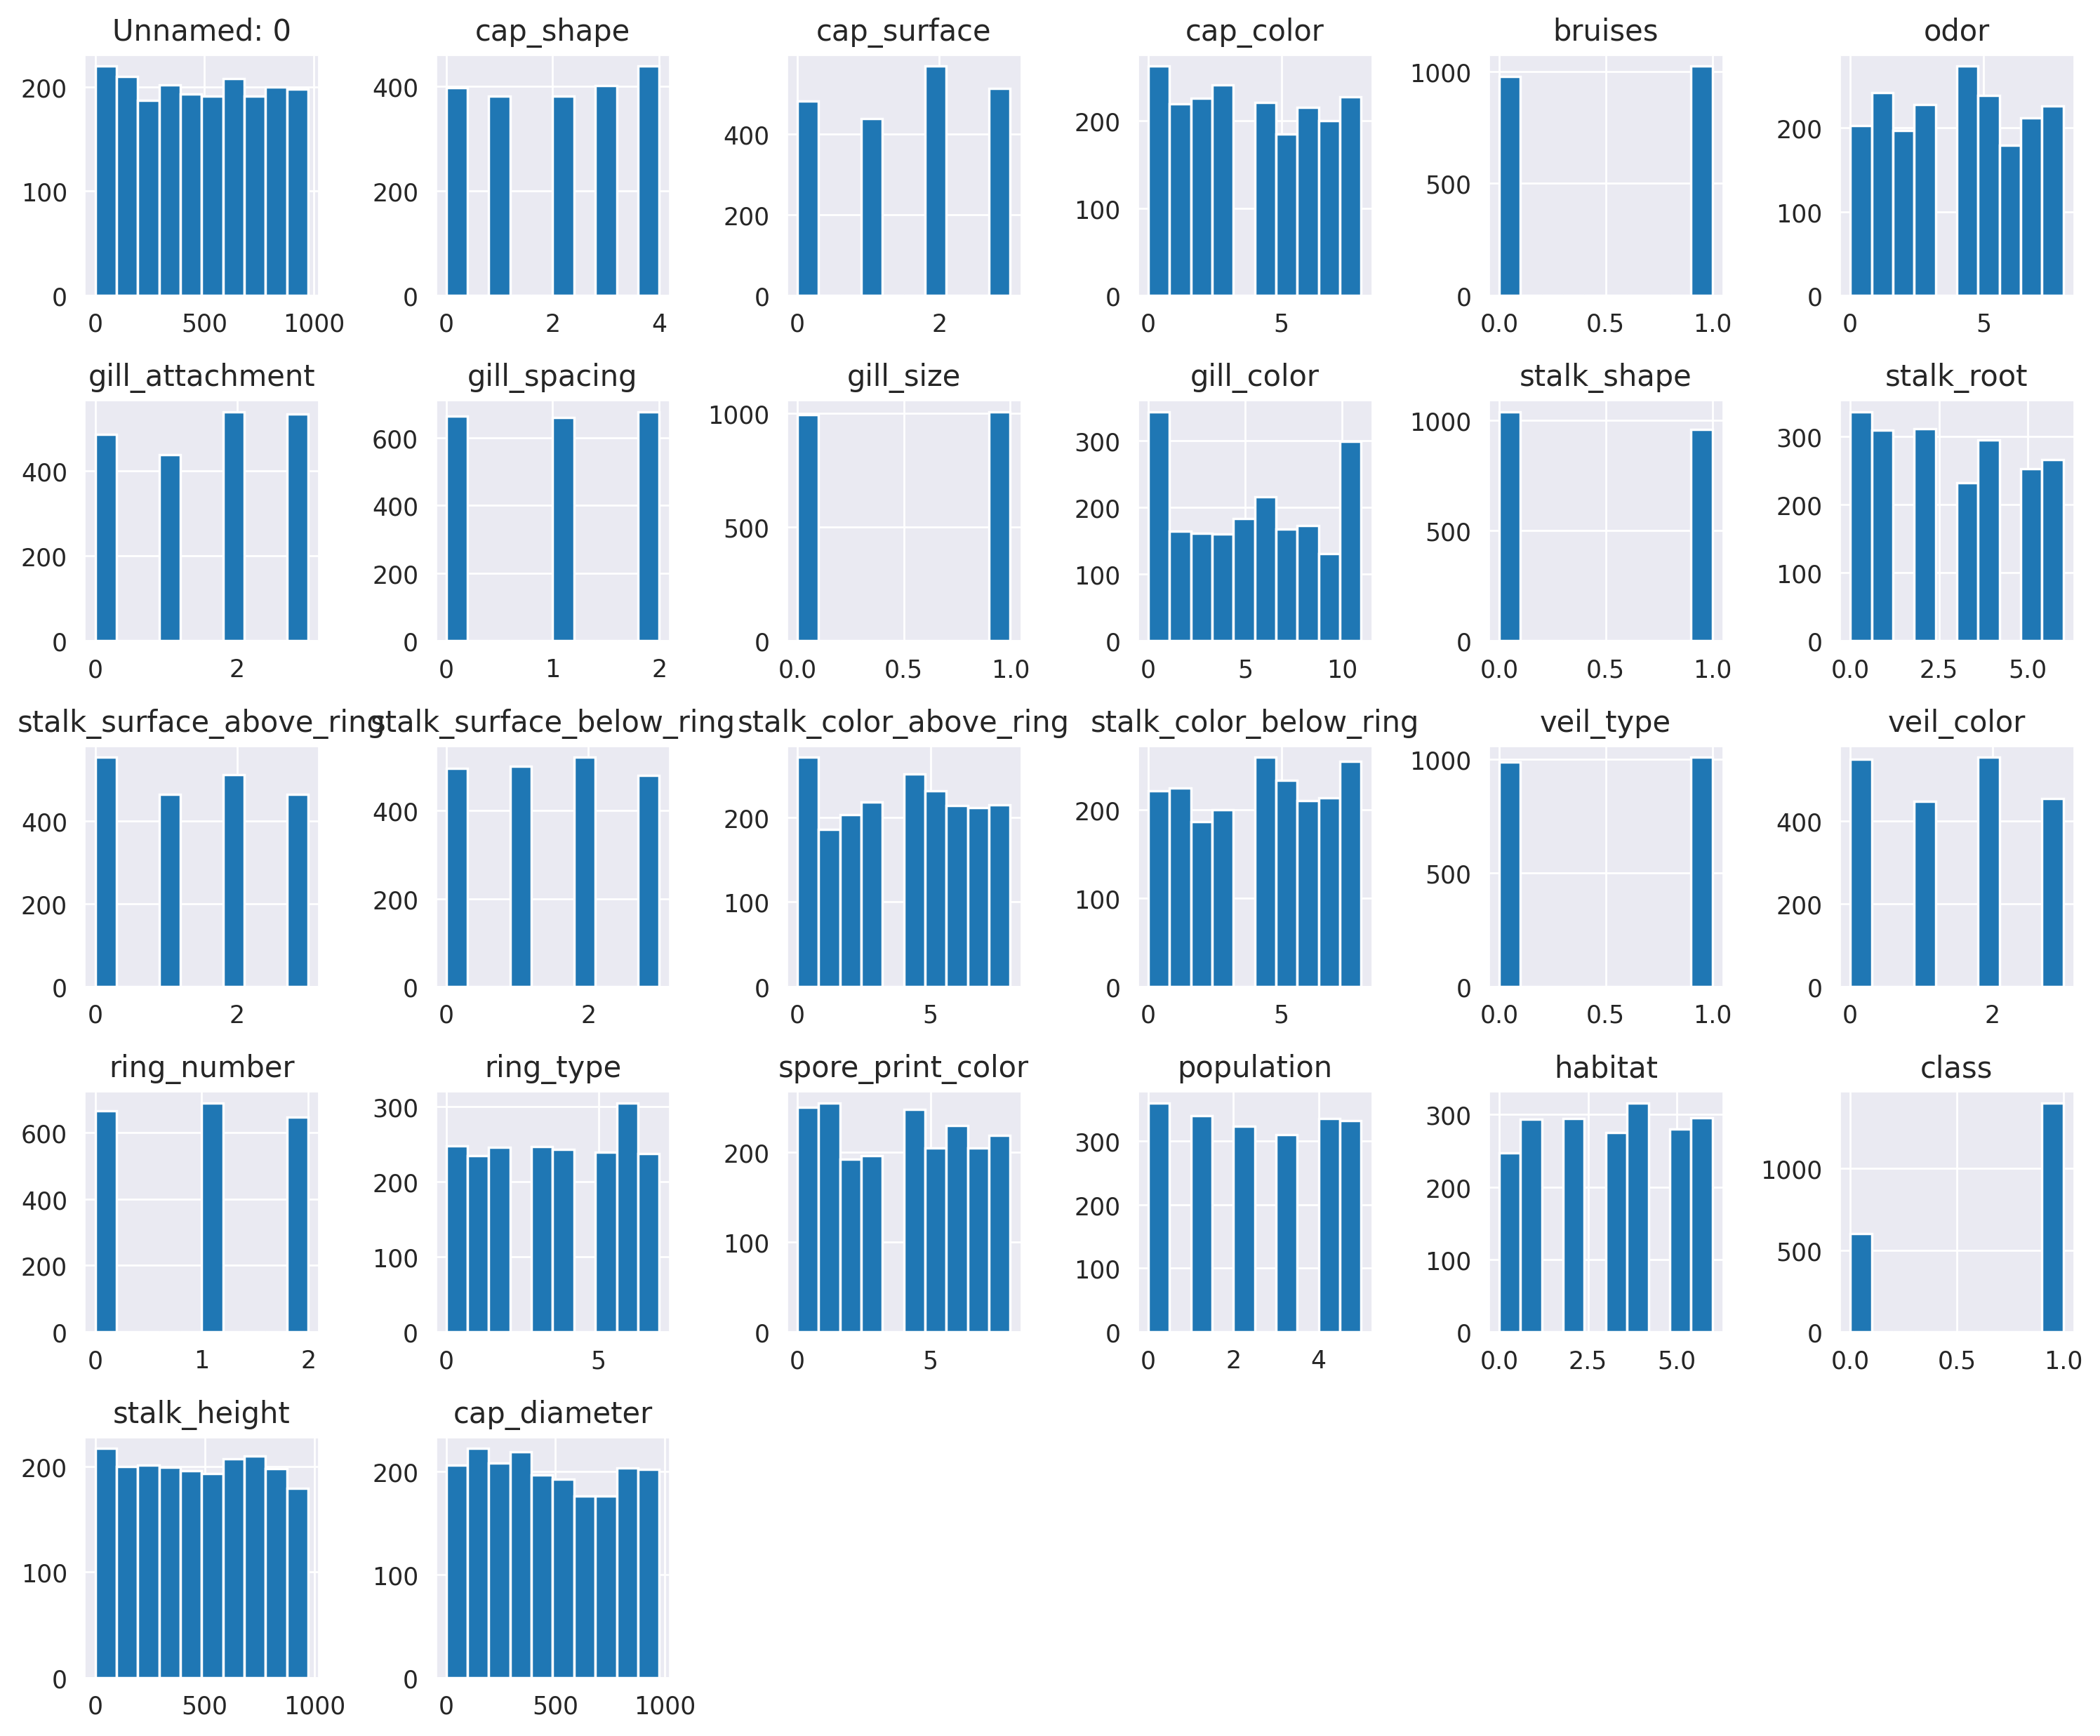

In [15]:
# Histogram plot

# Improve layout with figsize and layout
md.hist(figsize=(12, 10), layout=(5, 6))  # Adjust layout=(rows, columns) as per your features
plt.tight_layout()
plt.show()

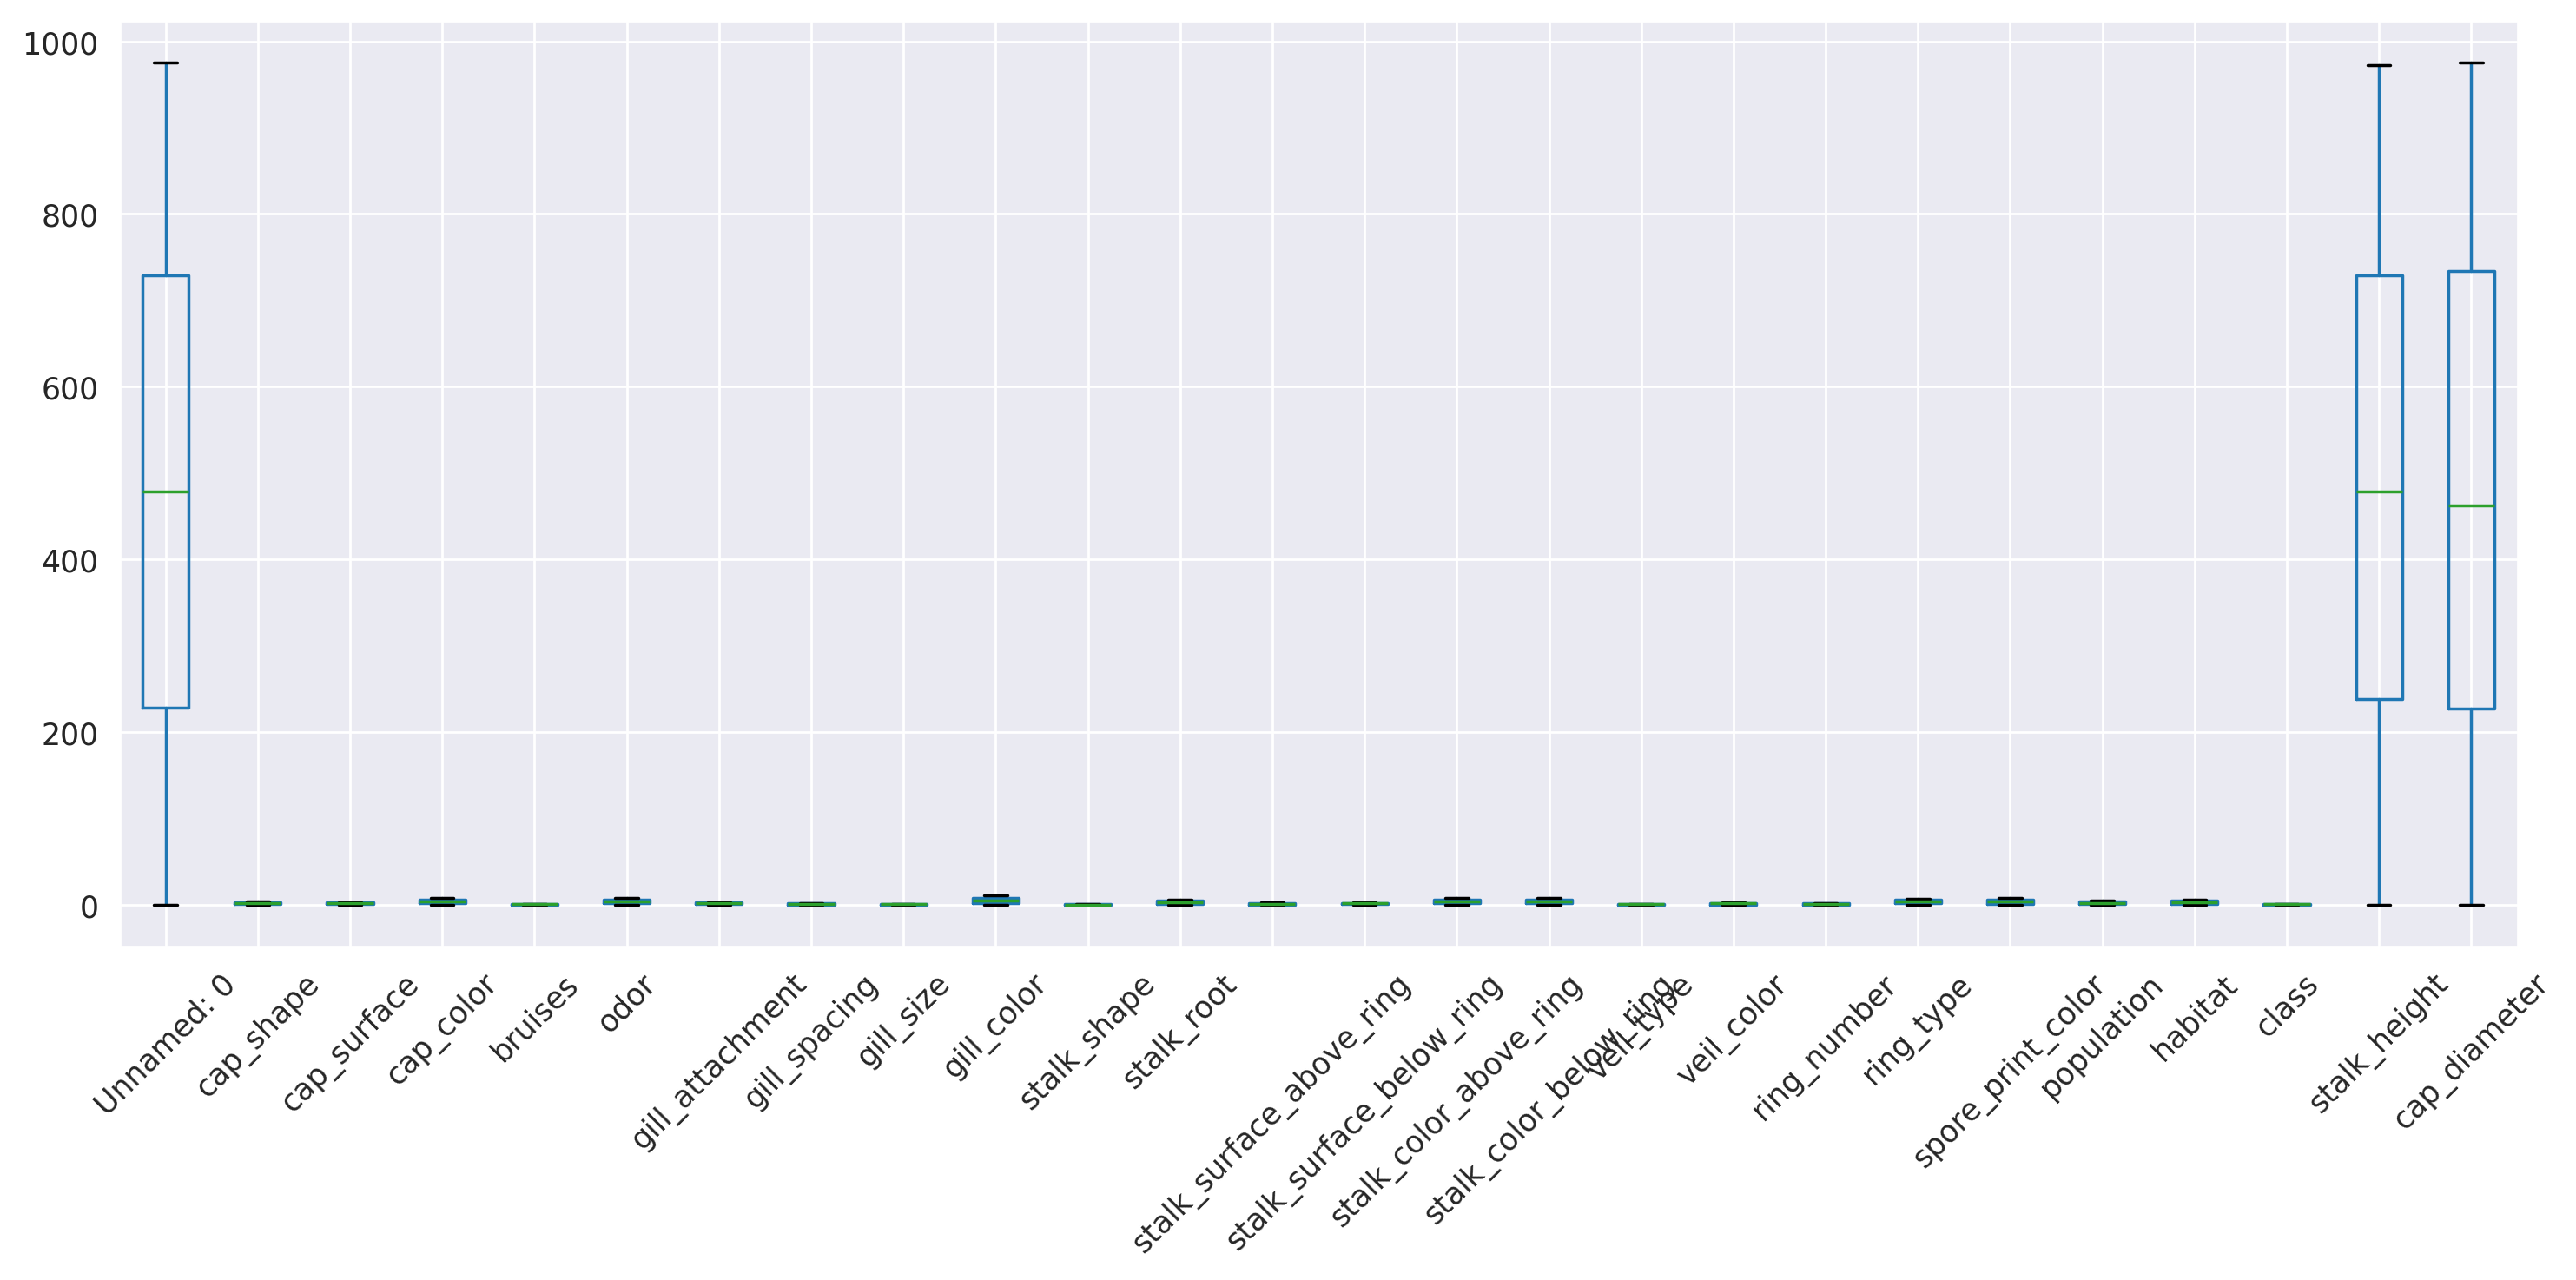

In [17]:
plt.figure(figsize=(12, 6))
md.boxplot(rot=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


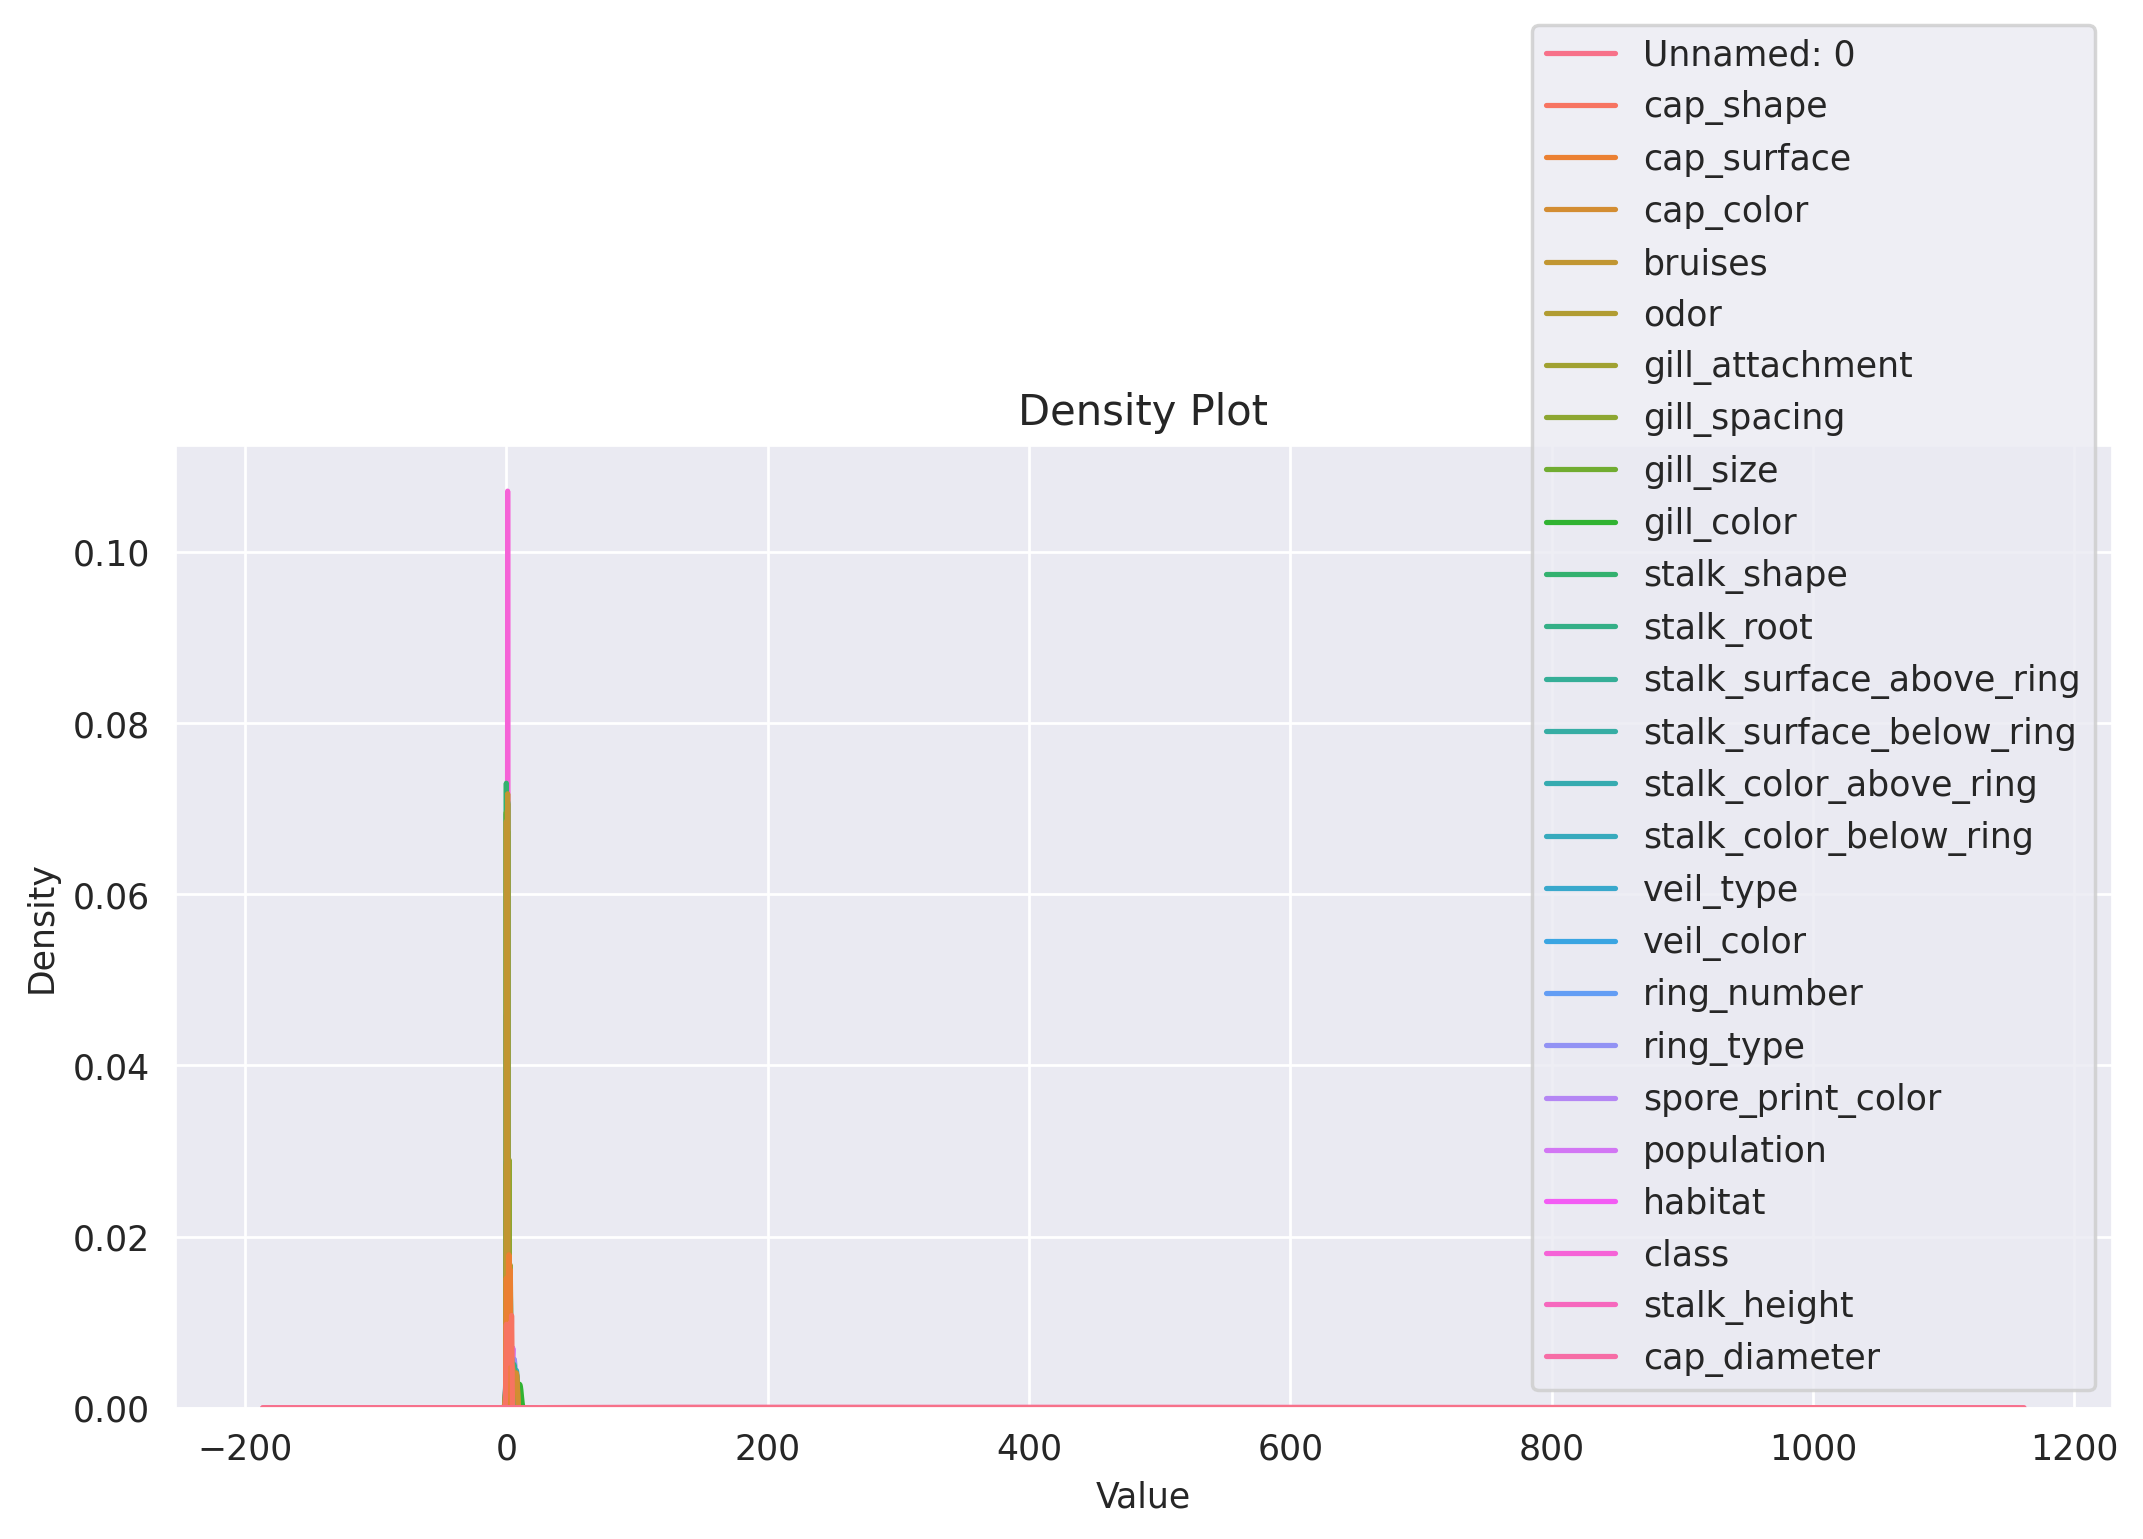

In [21]:
# Create density plot
sns.kdeplot(md)
plt.title("Density Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [20]:
md.corr()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.075763,-0.018949,0.023832,-0.046098,-0.012166,-0.005352,0.047559,-0.022678,0.038787,...,0.019621,-0.049108,-0.066561,0.022132,-0.002575,0.020003,0.051963,0.005742,-0.001660,0.051861
cap_shape,0.075763,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.018949,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.023832,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.046098,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.012166,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,-0.005352,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,0.047559,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,-0.022678,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.038787,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822


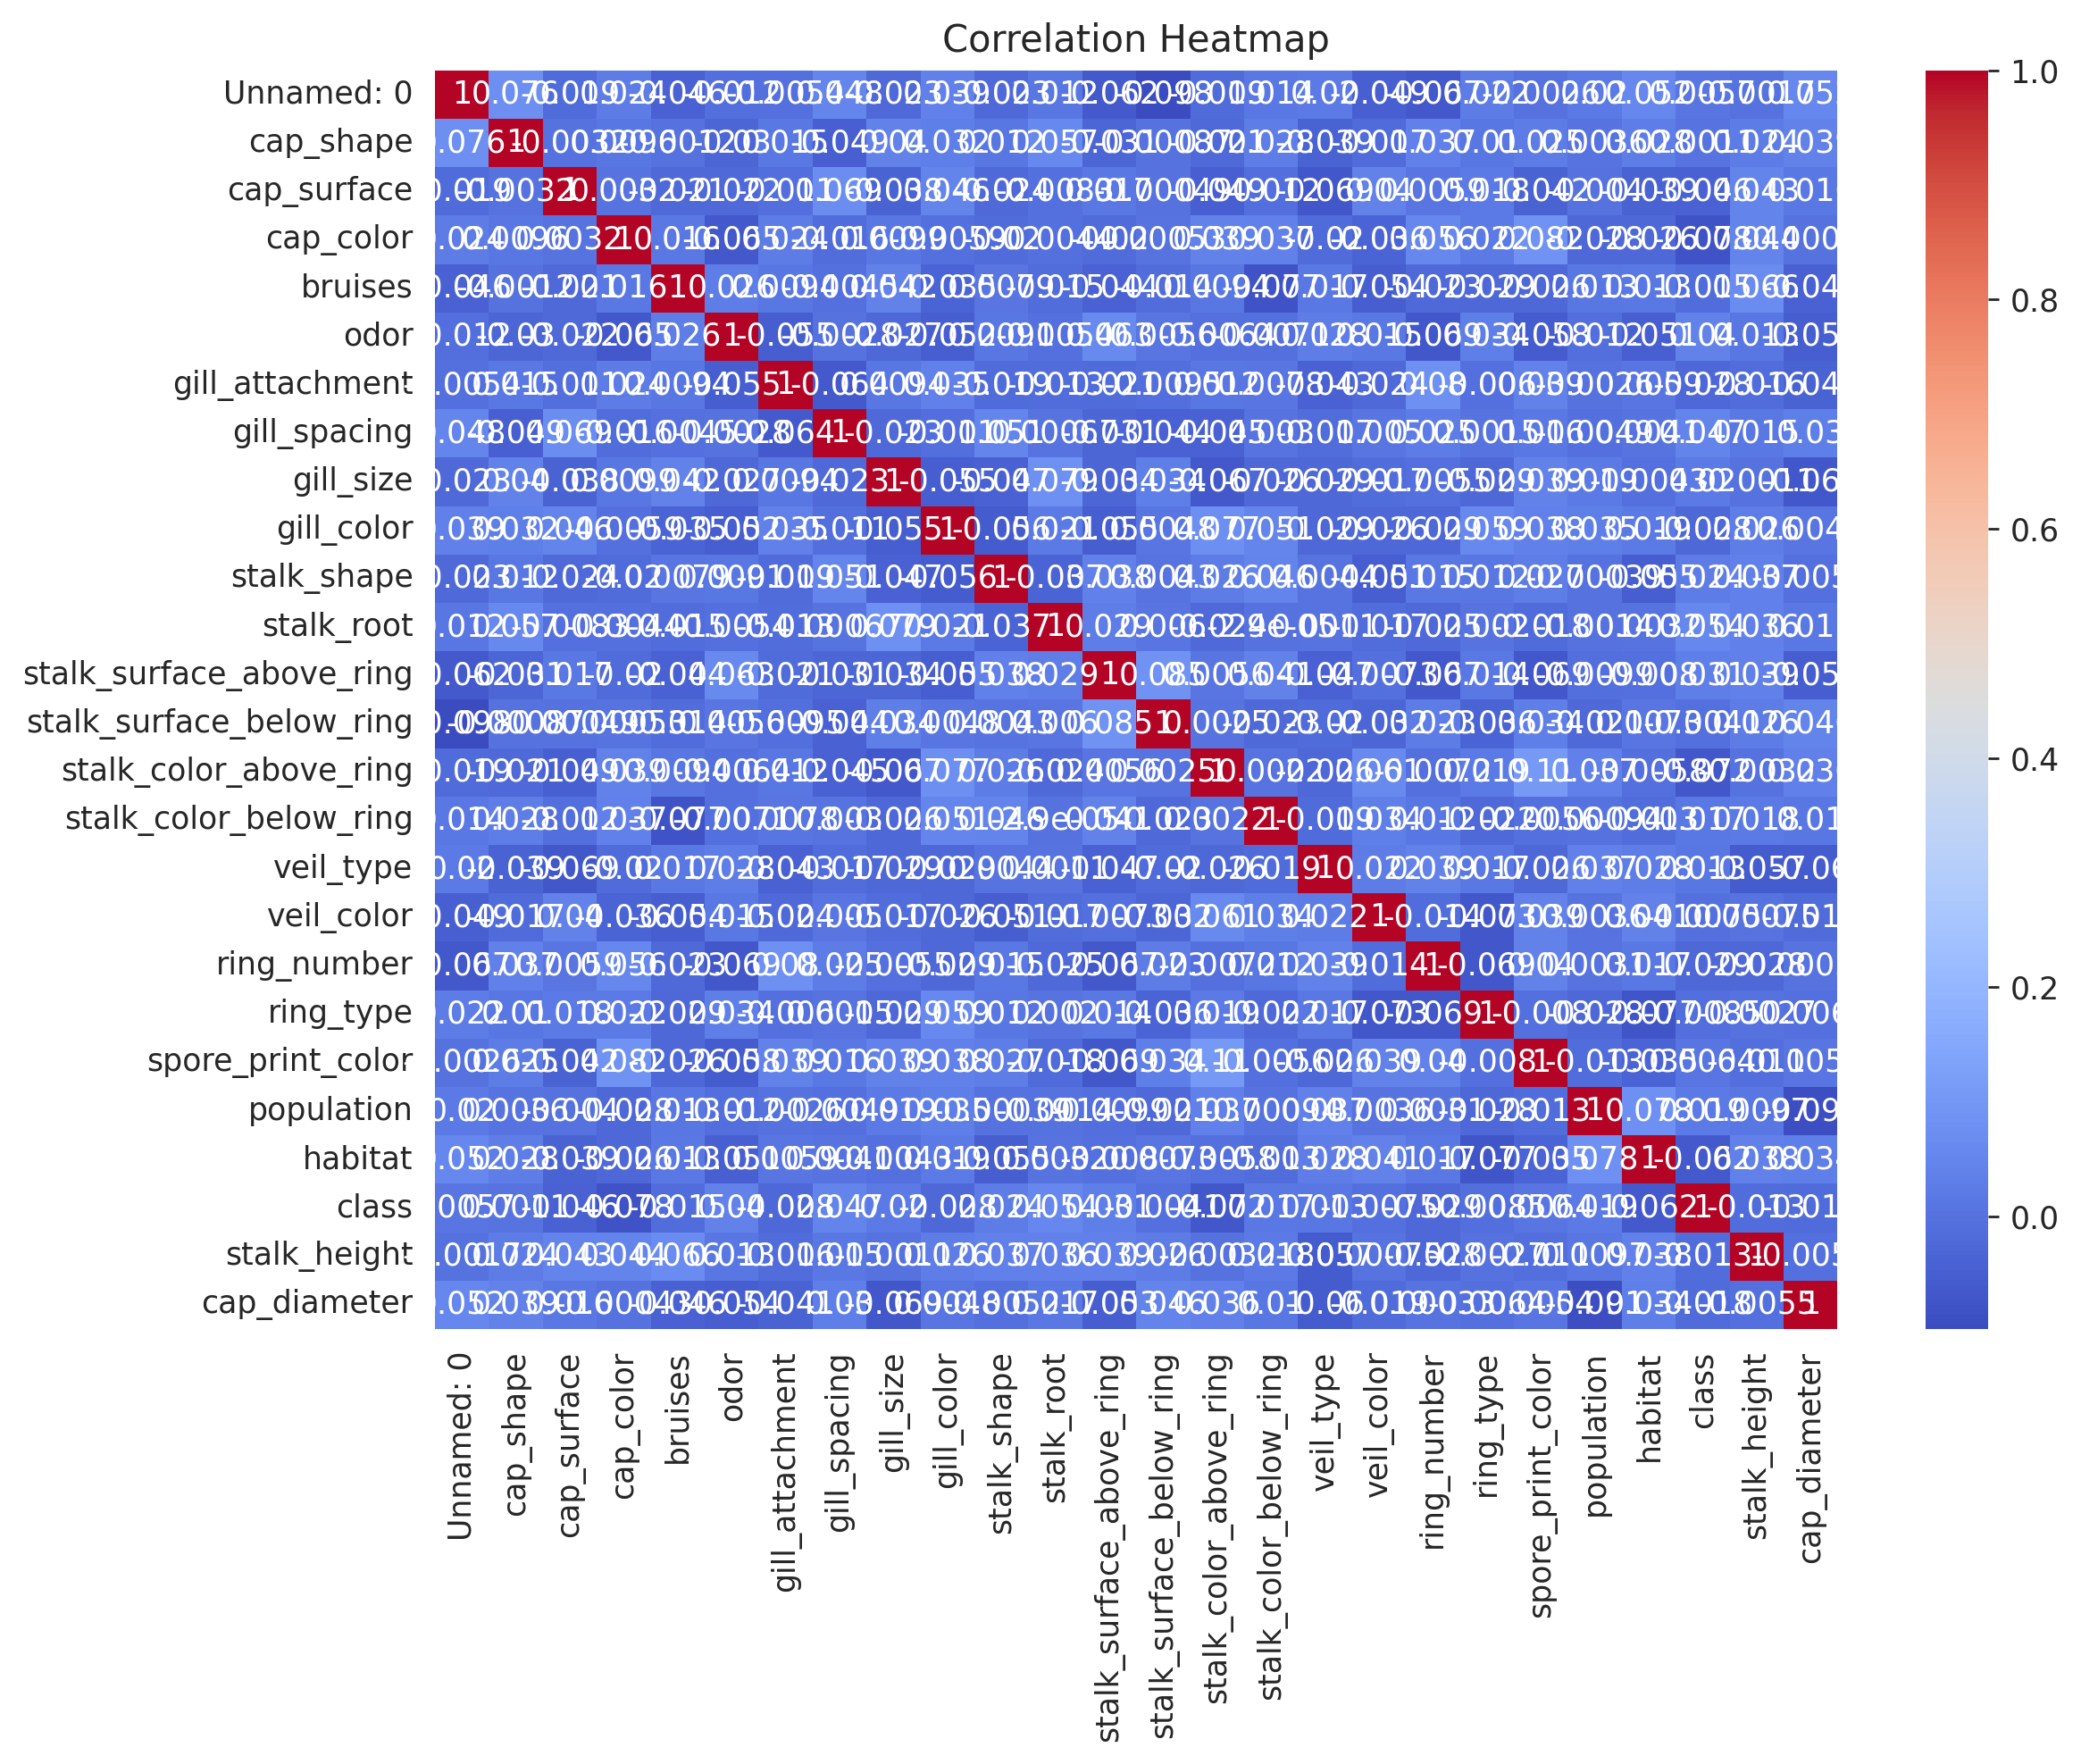

In [22]:
plt.figure(figsize=(10, 8))
corr = md.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')  # `annot=True` shows the values
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [27]:
#Drop Unnecessary ‘Unnamed’ Columns
zd = md.loc[:, ~md.columns.str.contains('^Unnamed')]


# Data Preprocesing

In [28]:
# Encode all categorical columns using One-Hot Encoding
md_encoded = pd.get_dummies(md, drop_first=True)

# Display the shape and column names of encoded data
print(md_encoded.shape)
print(md_encoded.columns)


(2000, 26)
Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [29]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split

In [30]:
x = md.drop(['class'],axis=1)
y = md['class']

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
svc = SVC()

In [32]:
x.shape

(2000, 25)

In [33]:
y.shape

(2000,)

In [34]:
x.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,916,190
1,786,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,128,750
2,246,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,537,281
3,221,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,234,829
4,630,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,895,484


In [35]:
y.head()

,class
0,1
1,0
2,1
3,1
4,1


# Data Visualization

In [36]:
# scatter plot
plt.figure(figsize=(14,12))
sns.scatterplot(data=md)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

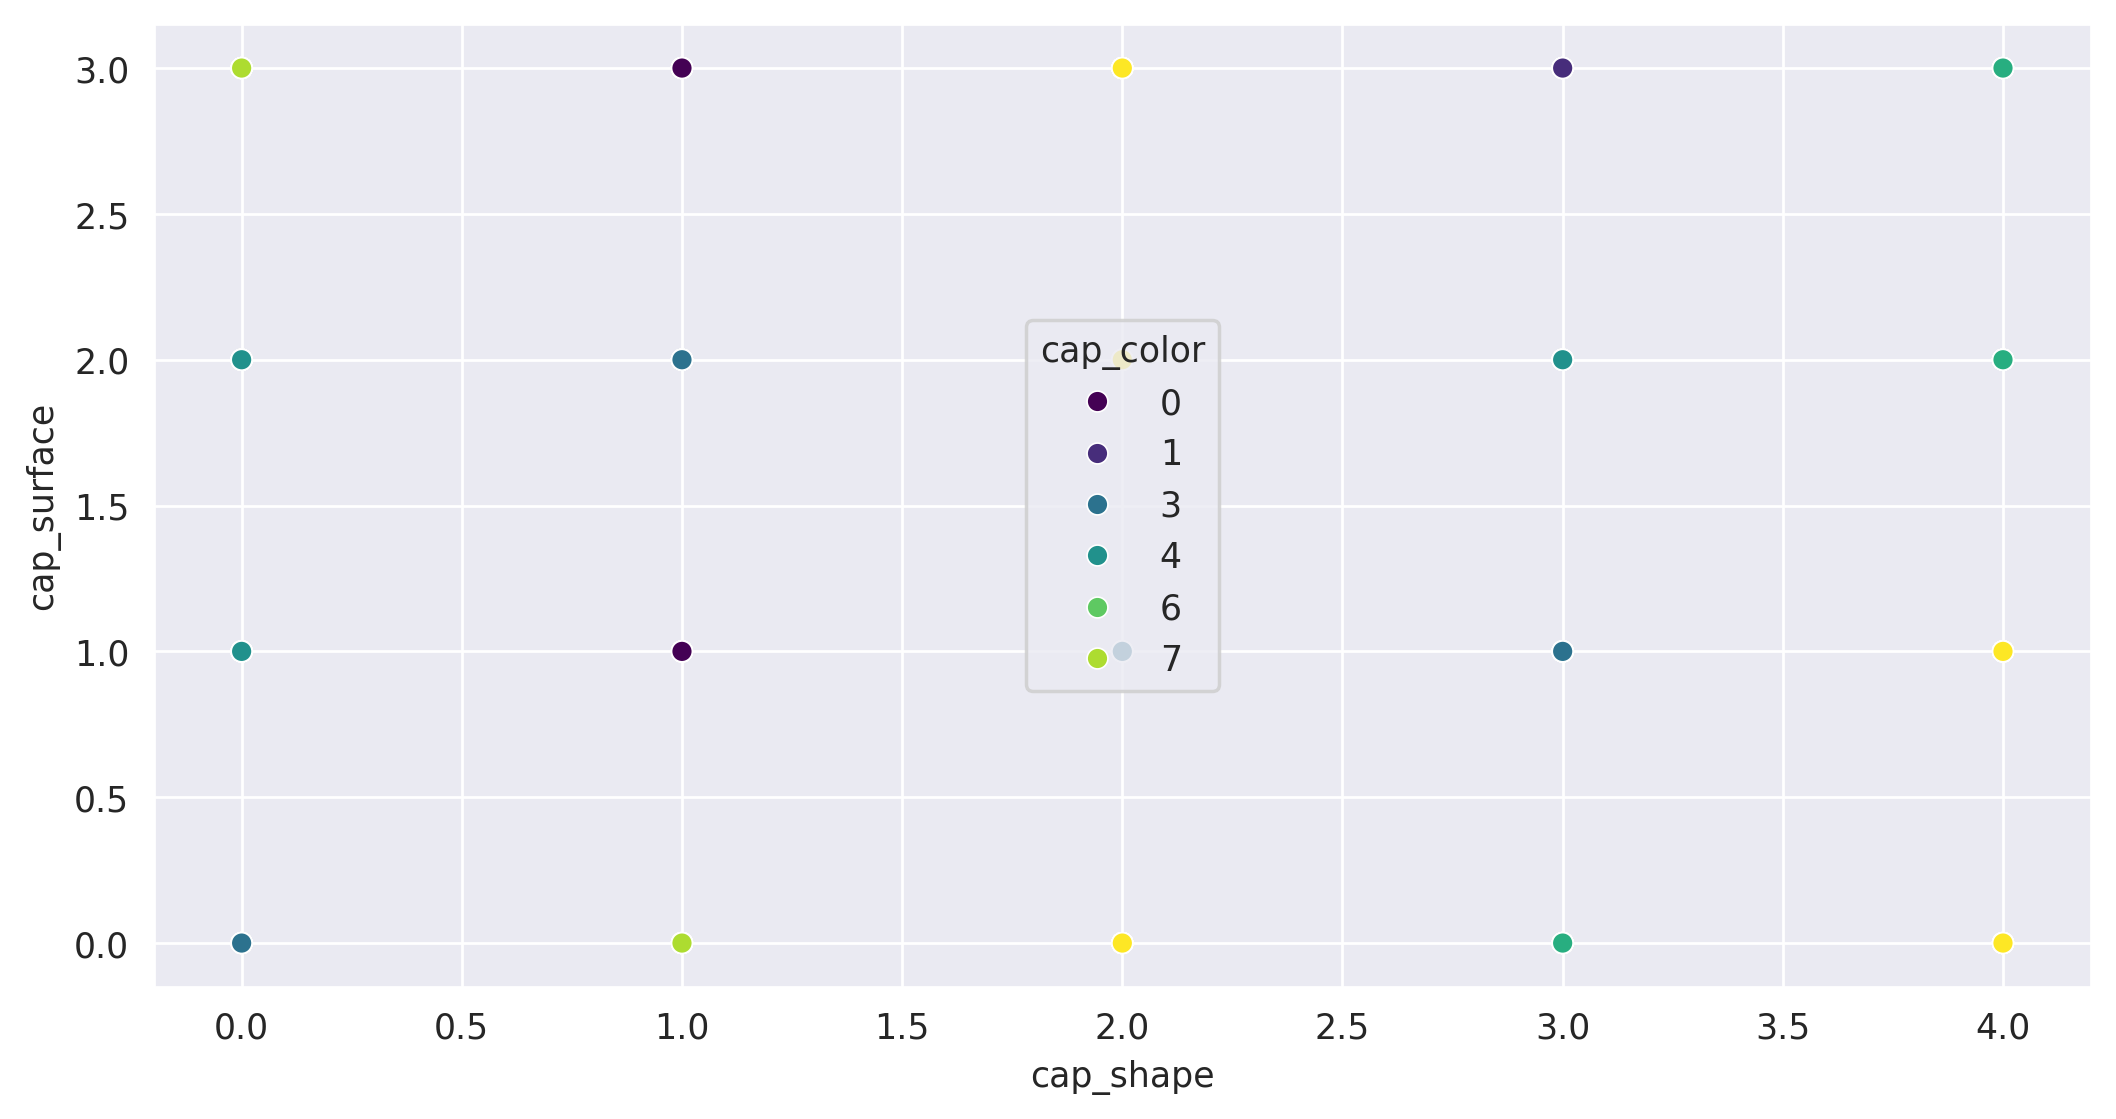

In [37]:
#2D scatterplot to understand the data.
sns.scatterplot(x= md['cap_shape'], y = md['cap_surface'], hue= md['cap_color'], palette='viridis')
plt.show()

In [38]:
import plotly.express as pe

In [39]:
pe.scatter_3d(data_frame=md,x='cap_shape',y='cap_surface',z='cap_color',color = 'cap_color')

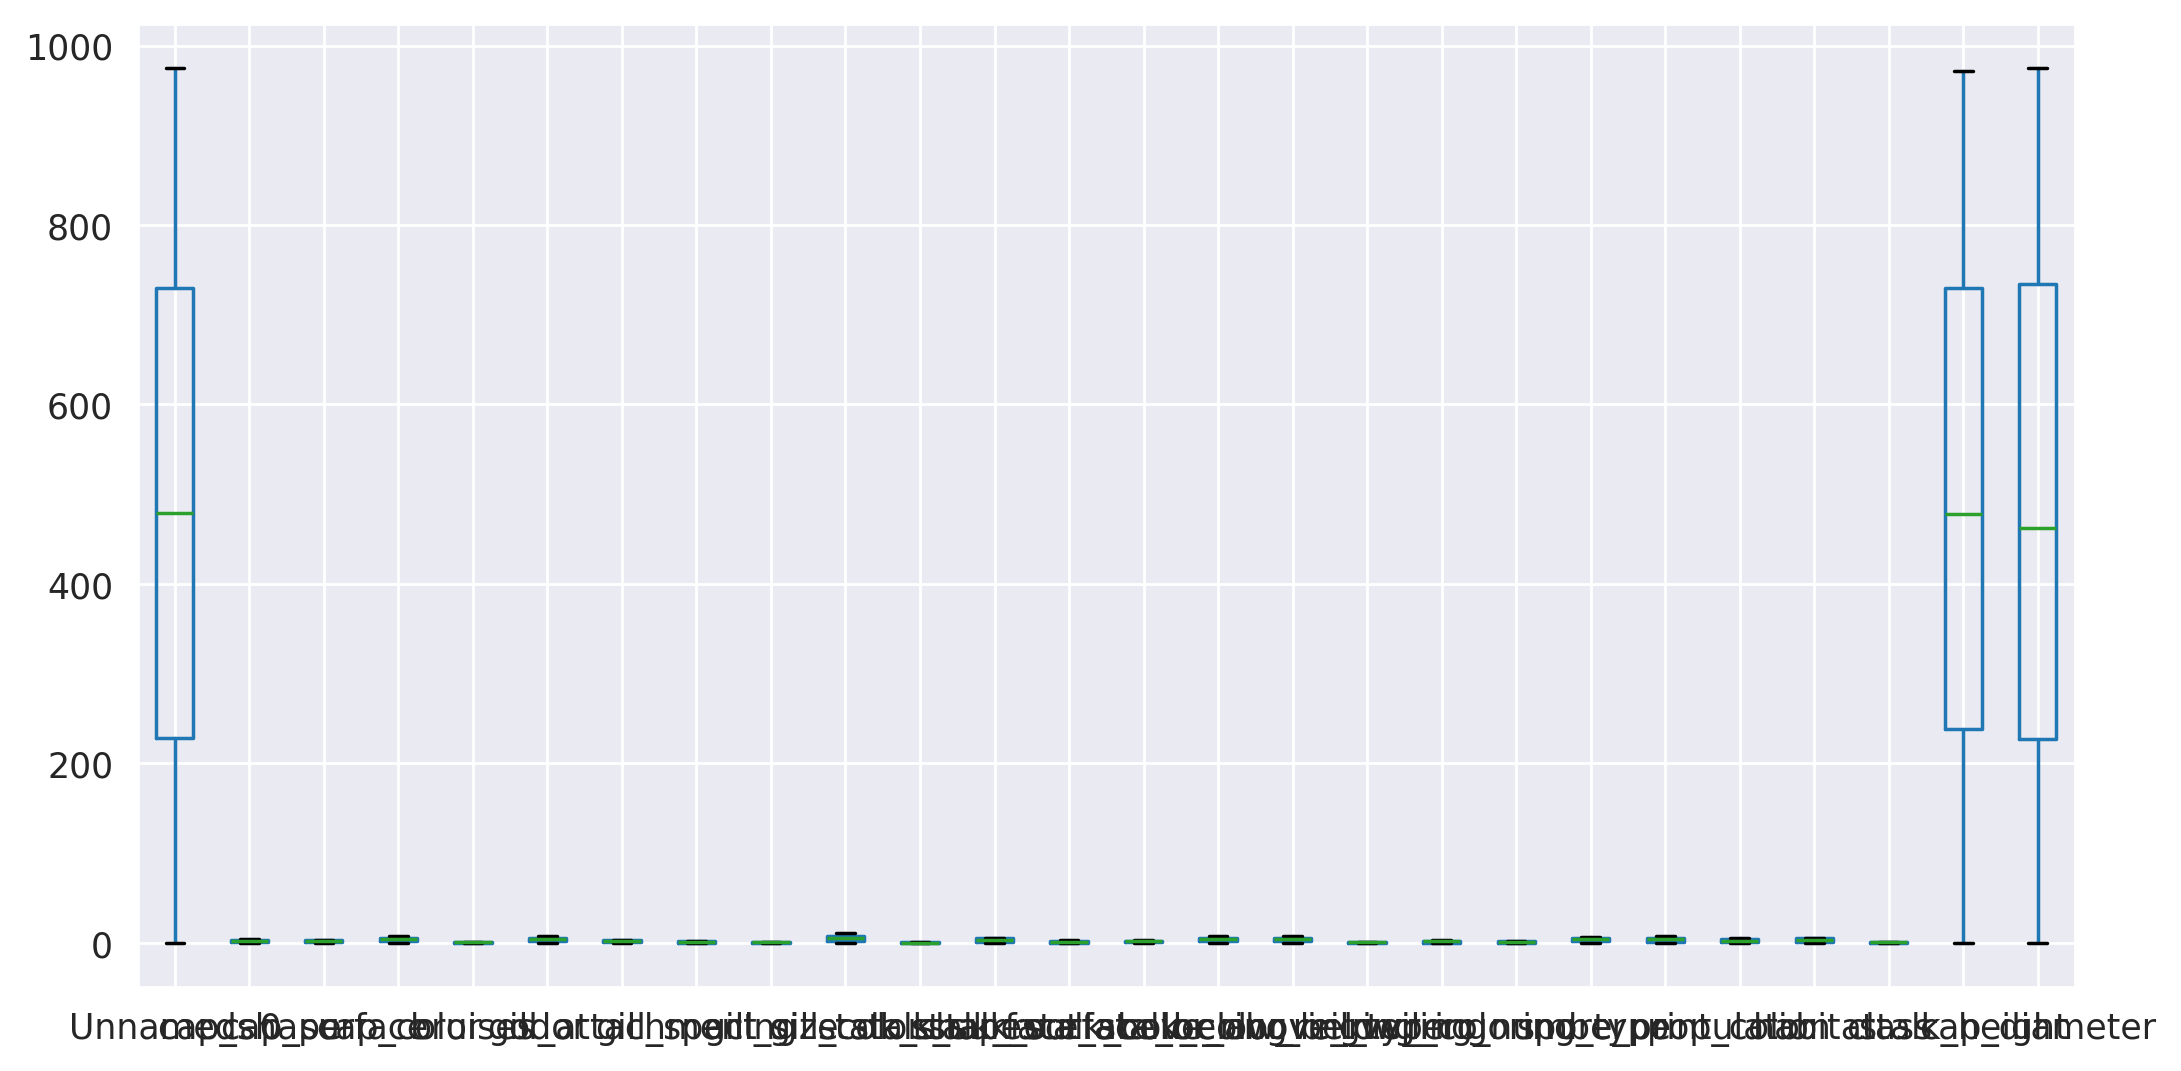

In [40]:
md.boxplot()
plt.show()

In [41]:
count = md['class'].value_counts()

In [42]:
# To check if the data is balance or imbalance
class_counts = md['class'].value_counts()
print(class_counts)

class
1    1400
0     600
Name: count, dtype: int64


In [43]:
class_percentage = class_counts / len(md) * 100
print(class_percentage)

class
1    70.0
0    30.0
Name: count, dtype: float64


# SVM Implementation

In [44]:
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print('svc_score for train',svc.score(xtrain,ytrain))
print('svc_score for test',svc.score(xtest,ytest))

svc_score for train 0.7025
svc_score for test 0.69


In [45]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400



# Visualization of SVM Results

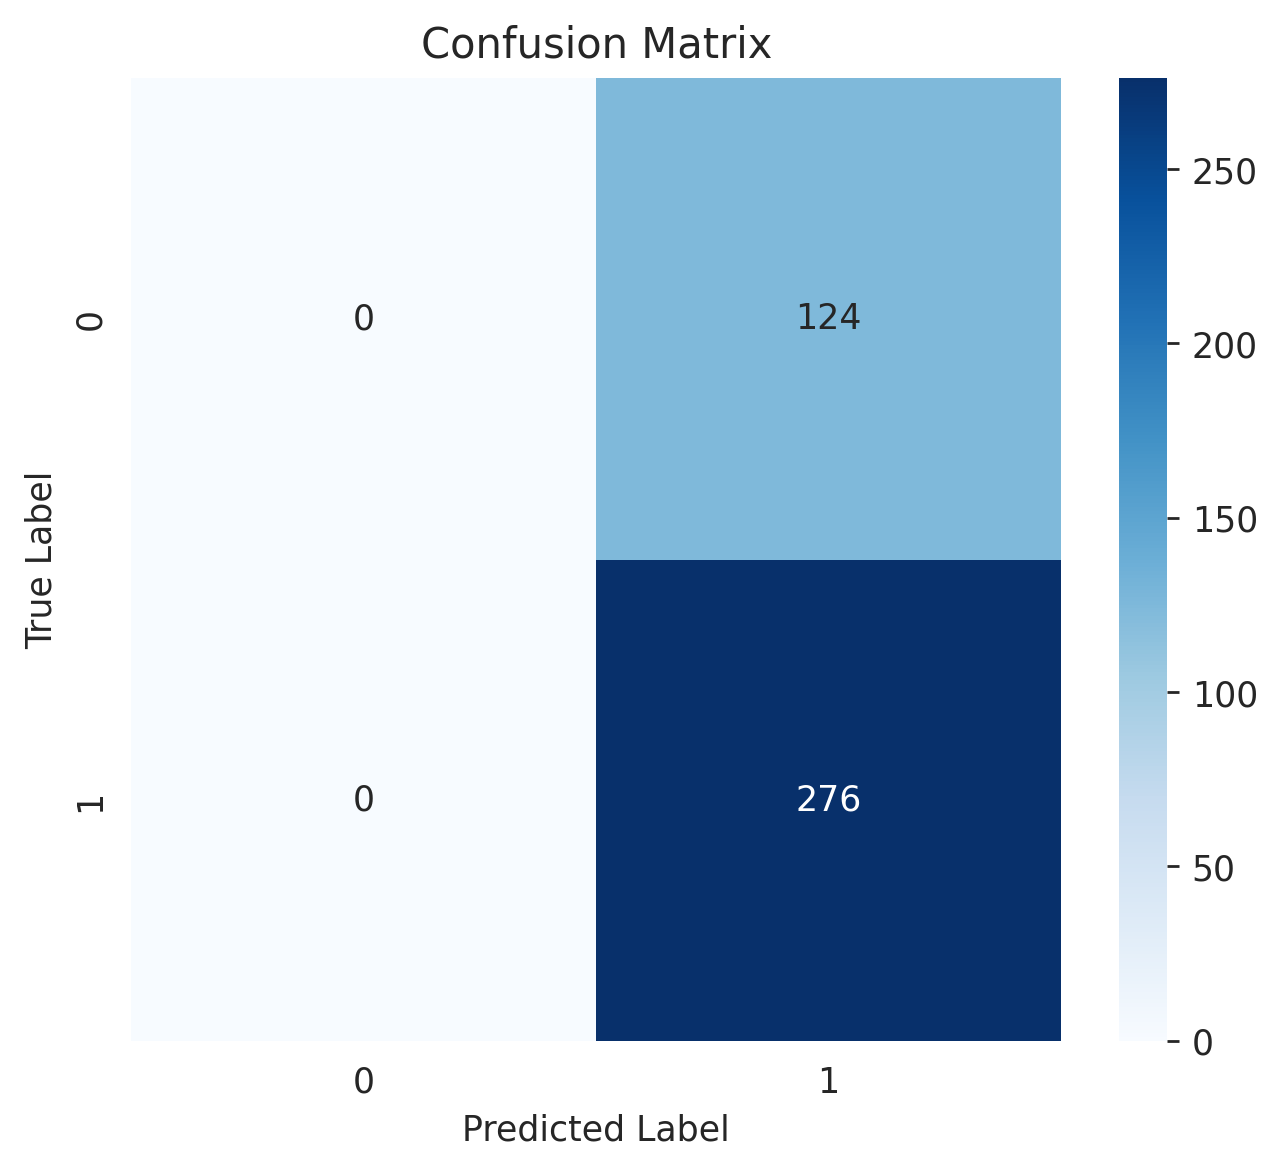

In [46]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
ypred = svc.predict(xtest)

# Generate confusion matrix
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

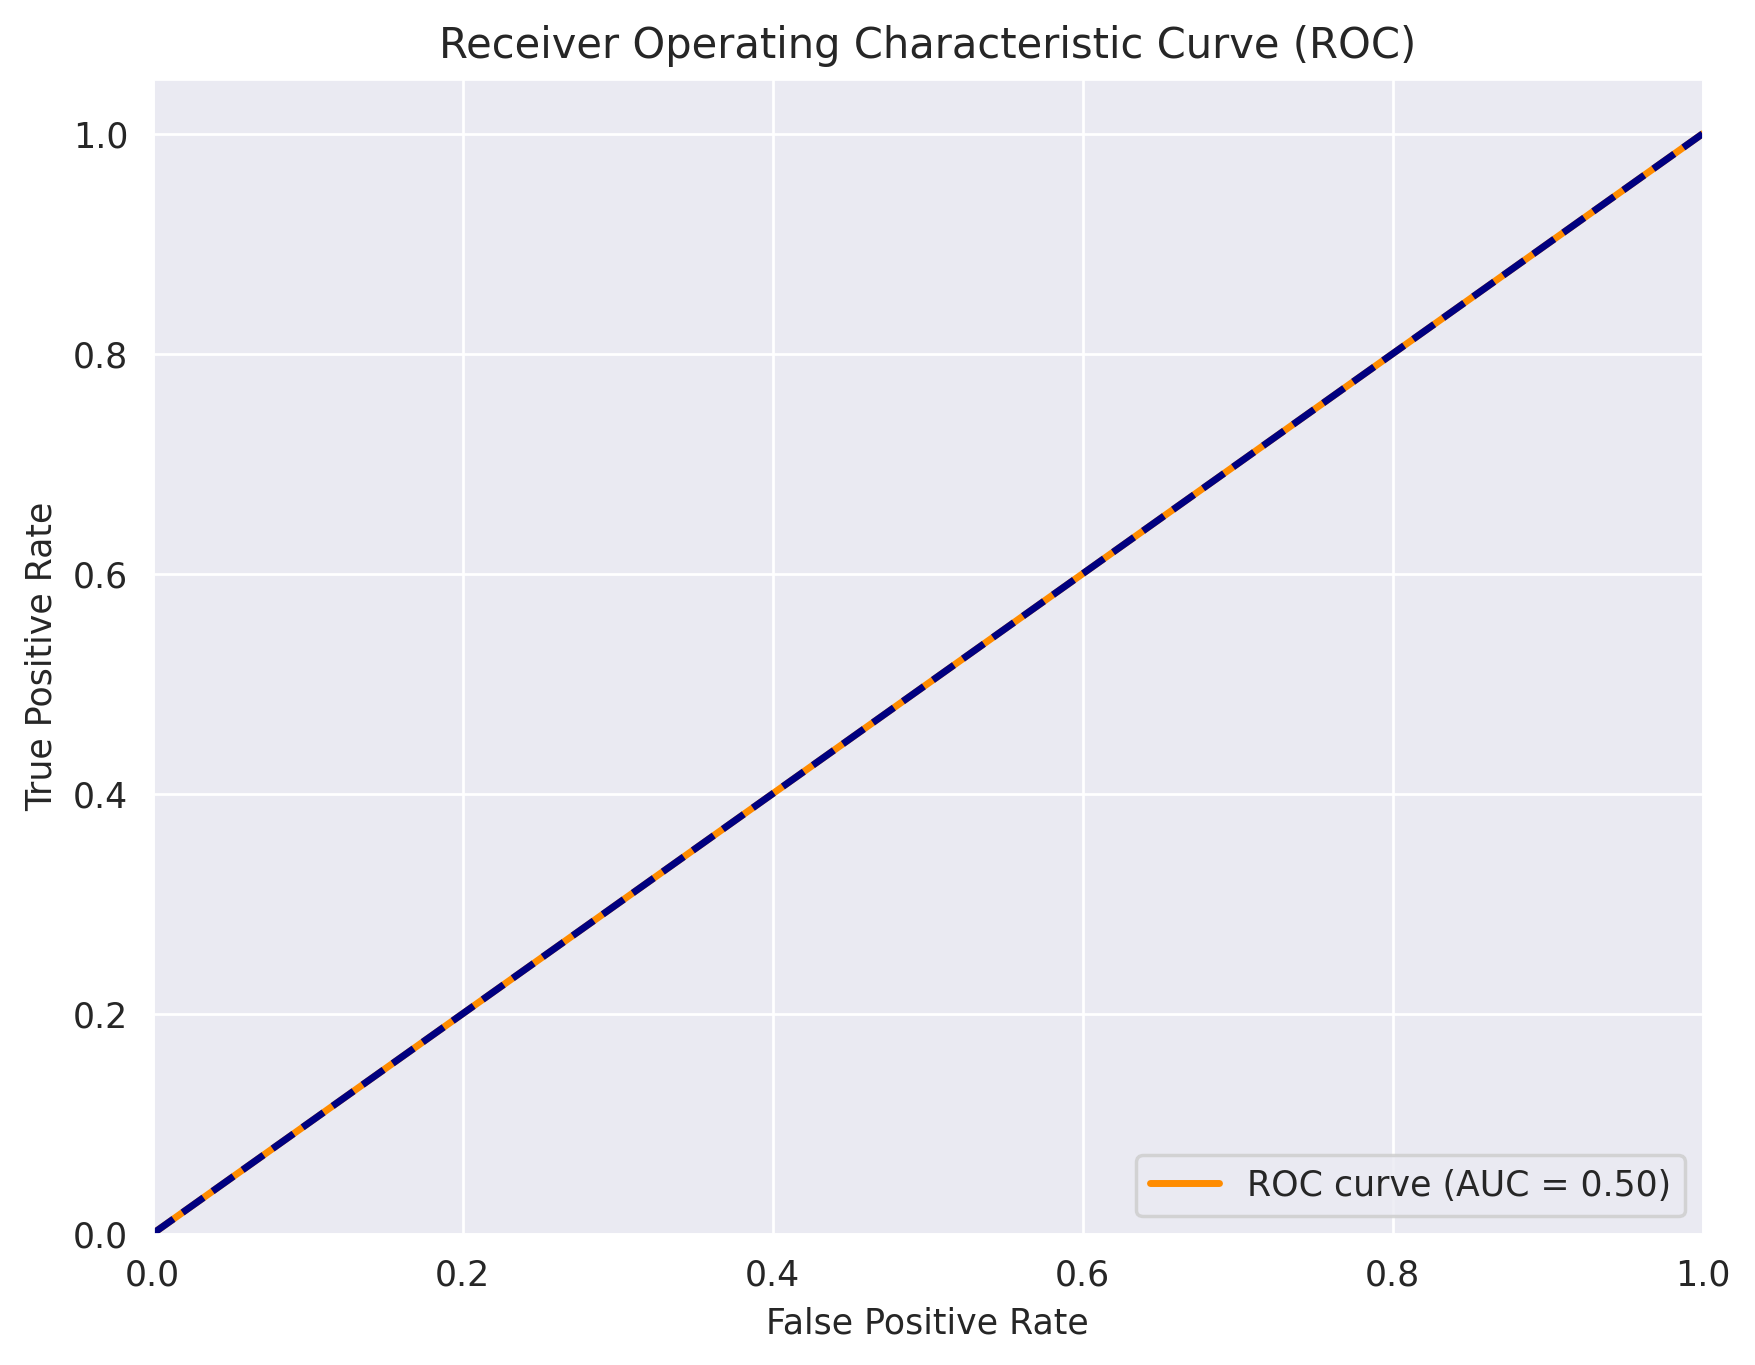

In [47]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob = svc.predict(xtest)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc='lower right')
plt.show()

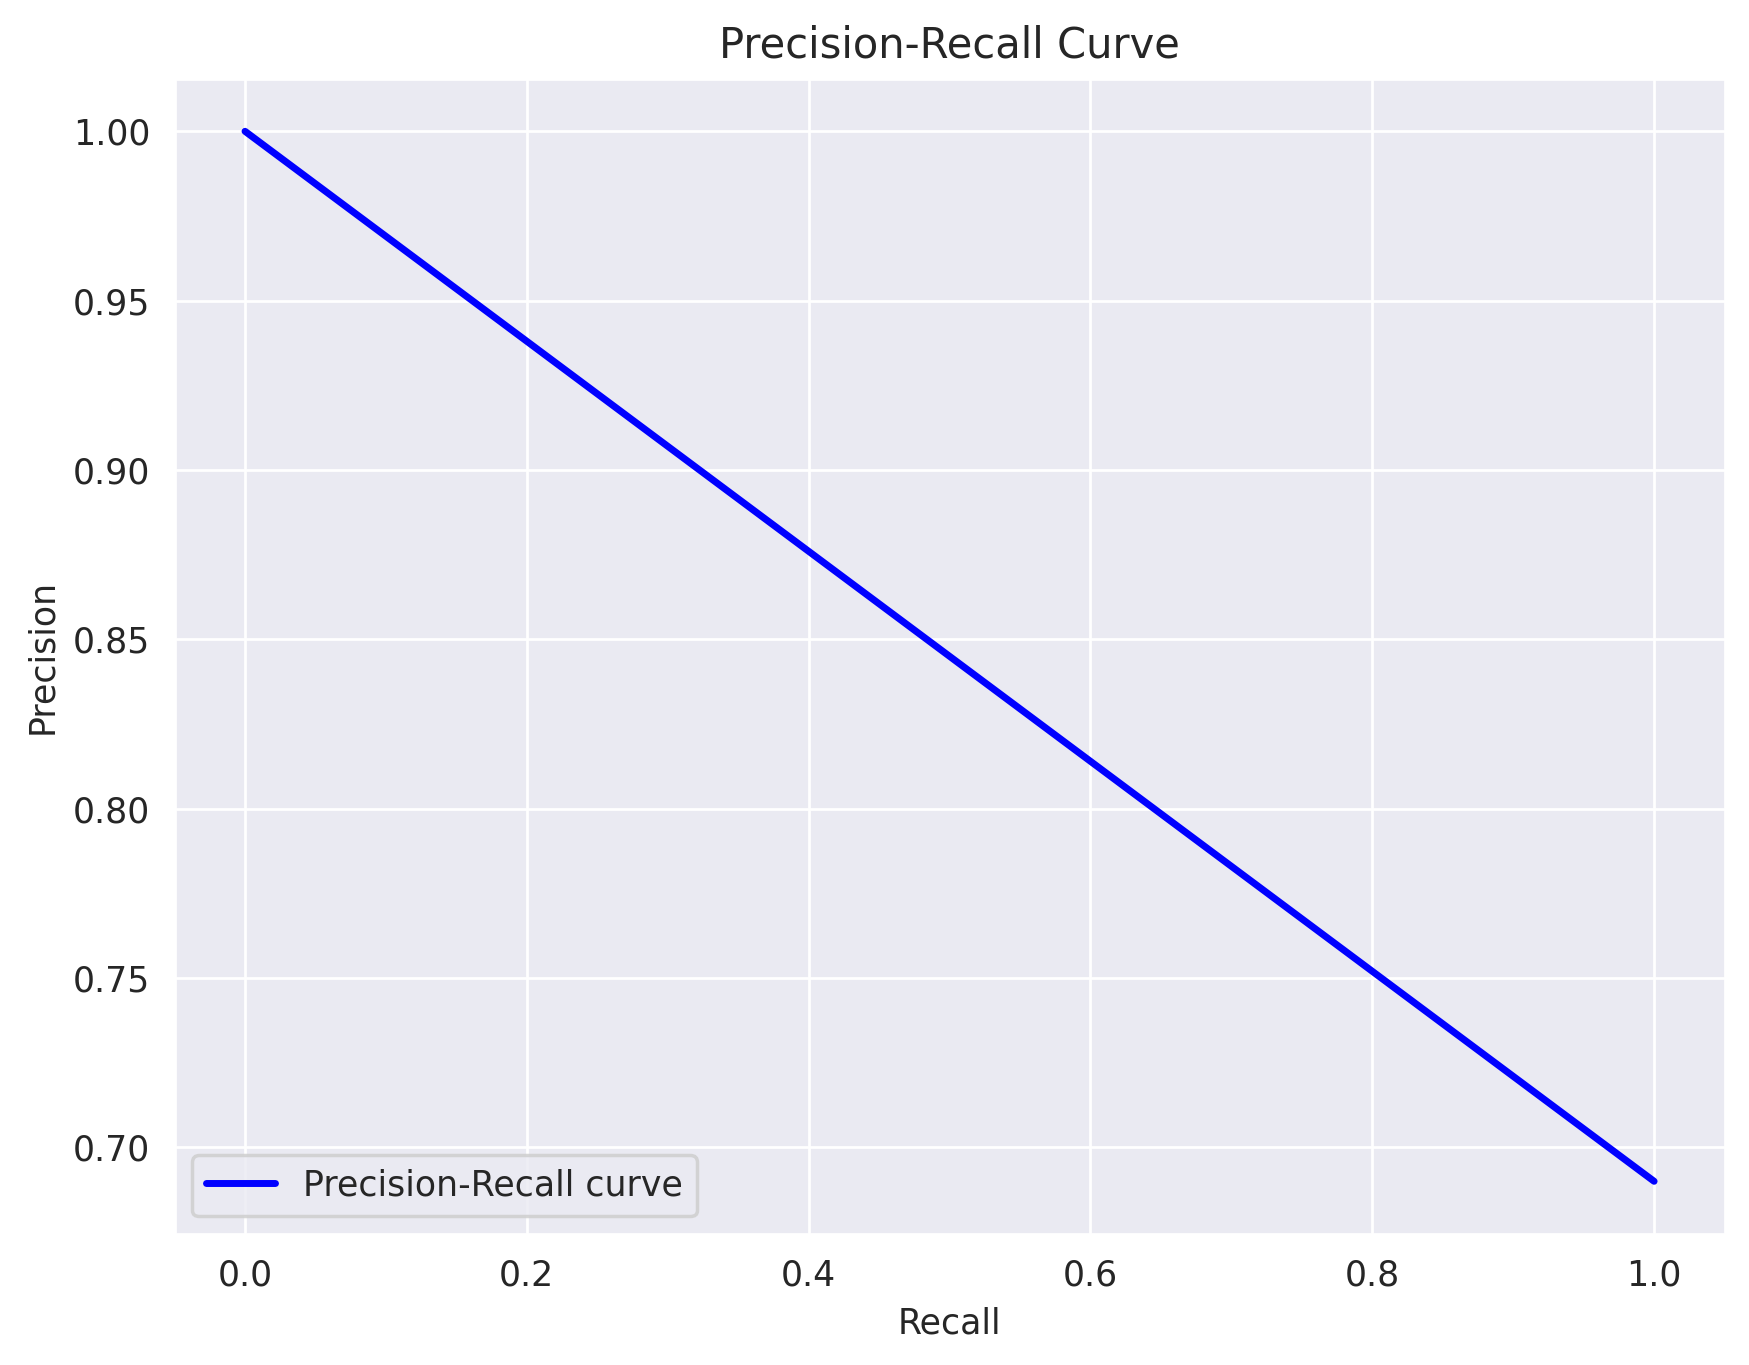

In [48]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(ytest, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Parameter Tuning and Optimization

In [49]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [50]:
x

array([[ 1.4358029 ,  1.35664266,  0.39842442, ...,  0.97916574,
         1.55384785, -1.00667629],
       [ 1.07325574,  1.35664266, -1.39628018, ...,  0.97916574,
        -1.2467361 ,  0.96340142],
       [-0.82747693,  0.66003539, -0.49892788, ...,  0.97916574,
         0.20686648, -0.68653866],
       ...,
       [-0.97179182, -0.03657188, -0.49892788, ...,  1.4865055 ,
         1.35126754, -0.1342133 ],
       [-0.53532728, -1.42978643,  1.29577672, ...,  1.4865055 ,
         0.71154024, -0.54933682],
       [ 1.17181225, -0.03657188,  0.39842442, ...,  0.47182598,
         1.23043016,  1.25187709]])

In [51]:
xtrain,xtest,ytarin,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.879375
0.795


In [53]:
#With help of GrideSearchCV -> Kernel

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [56]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [57]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [58]:
grid.best_params_

{'kernel': 'poly'}

In [59]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.943125
0.8425


In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.68       124
           1       0.83      0.97      0.90       276

    accuracy                           0.84       400
   macro avg       0.87      0.76      0.79       400
weighted avg       0.85      0.84      0.83       400



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')  # Weighted average for multi-class
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

In [62]:
# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8425
Precision: 0.8522
Recall: 0.8425
F1 Score: 0.8295


# Comparison and Analysis

In [63]:
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)  # Polynomial kernel with degree 3
svm_rbf = SVC(kernel='rbf', random_state=42)

# List of classifiers
classifiers = [svm_linear, svm_poly, svm_rbf]
kernel_names = ['Linear', 'Polynomial', 'RBF']

# Evaluate the classifiers using cross-validation
for clf, name in zip(classifiers, kernel_names):
    scores = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='accuracy')
    print(f'{name} Kernel - Mean Accuracy: {scores.mean():.4f} | Std Dev: {scores.std():.4f}')

Linear Kernel - Mean Accuracy: 0.7025 | Std Dev: 0.0013
Polynomial Kernel - Mean Accuracy: 0.8219 | Std Dev: 0.0217
RBF Kernel - Mean Accuracy: 0.7787 | Std Dev: 0.0114


# Discuss practical implications of SVM in real-world classification tasks.
- Example Real-World Use Cases:
- Mushroom Classification: In a real-world scenario, classifying mushrooms as edible or poisonous using SVM can be highly beneficial due to its high accuracy and ability to handle non-linear relationships in data. This can be used in agriculture or food safety.
- Medical Diagnostics: SVM has been successfully applied in classifying medical images (e.g., detecting tumors) or classifying patient data for disease prediction, where accurate decision boundaries are crucial.
- Finance: In credit scoring or fraud detection, SVM can classify transactions or individuals into "fraudulent" or "non-fraudulent" categories. The RBF kernel, in particular, helps to separate complex, non-linear financial patterns.

- Conclusion:
- Kernel Comparison: Different kernels provide varying levels of flexibility and performance. The RBF kernel is often the most powerful for complex, - - non-linear datasets, but it requires careful tuning.
- SVM Strengths and Weaknesses: SVM performs well on high-dimensional, non-linearly separable data, but it can be sensitive to parameter settings and - computationally expensive with large datasets.
- Real-World Implications: SVM is widely used in many practical applications, but its use may be limited by the need for hyperparameter tuning, - - ---- computational cost, and scalability issues.